In [1]:
from epidemic_pipeline import EpidemicPipeline

In [2]:
pipeline = EpidemicPipeline()

A carregar recursos do sistema...
Sistema pronto.



--- Resultados da Análise Molecular ---
pEpitope Previsto: 0.05961
INFO: Proteção Vacinal Provável.
Eficácia Vacinal (VE) Estimada: 32.28%
R0 Efetivo Estimado: 1.26

--- A Correr Simulação (160 dias, N=5000) ---


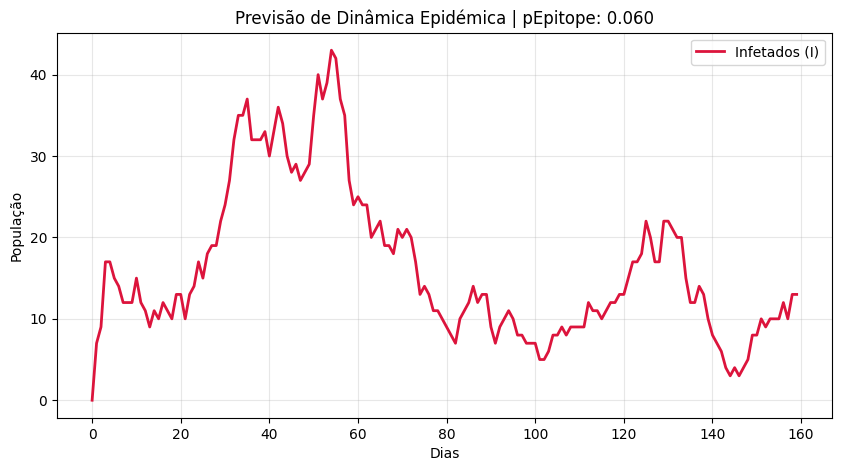

In [ ]:
nova_sequencia_viral = "MKAIIALSNILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTITNDRIEVTNATELVQNSSIGKICNSPHQILDGGNCKLIDALLGDPQCDGFQNKEWDLFVERSRANSSCYPYDVPDYASLRSLVASSGTLEFKDENFNWTGVKQNGTSSACKRGSSSSFFSRLNWLTSLNNIYPAQNVTMPNKEQFDKLYIWGVHHPDTDKNQFSLFAQSSGRITVSTKRSQQAVIPNIGSRPRVRDIPSRISIYWTIVKPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGECKSECITPNGSIPNDKPFQNVNRITYGACPRYVKQSTLKLATGMRNVPEKQTRGIFGAIAGFIENGWEGMMDGWYGFRHQNSEGRGQAADLKSTQAAIDQISGKLNRLIGKTNEKFHQIEKEFSEVEGRVQDLEKYVEDTKIDLWSYNAELLVALENQHTVDLTDSEMNKLFEKTKKQLRENAEDMGNGCFKIYHKCDNACIGSIRNETYDHNVYRDEALNNRFQIKGVELKSGYKDWILWISFAMSCFLLCIALLGFIMWACQKGNIRCNICI"
df_resultado, p_val = pipeline.predict_and_simulate(
        sequence=nova_sequencia_viral,
        sim_days=160,
        sim_N=5000,
        sim_vacc_coverage=0.5, # Podes editar a cobertura vacinal aqui
        sim_initial_cases=20
    )
    
    # 4. Visualizar
pipeline.plot_results(df_resultado, title_suffix=f"| pEpitope: {p_val:.3f}")

>>> Cenário Normal

--- Resultados da Análise Molecular ---
pEpitope Previsto: 0.05961
INFO: Proteção Vacinal Provável.
Eficácia Vacinal (VE) Estimada: 32.28%
R0 Efetivo Estimado: 1.31

--- A Correr Simulação (160 dias, N=5000) ---

>>> Cenário com Distanciamento

--- Resultados da Análise Molecular ---
pEpitope Previsto: 0.05961
INFO: Proteção Vacinal Provável.
Eficácia Vacinal (VE) Estimada: 32.28%
R0 Efetivo Estimado: 1.31

--- A Correr Simulação (160 dias, N=5000) ---


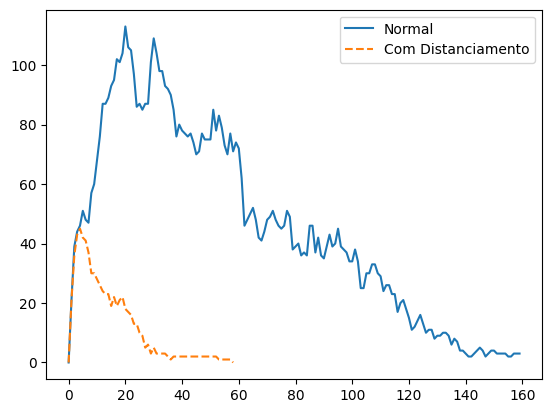

In [4]:
print(">>> Cenário Normal")
df_normal, _ = pipeline.predict_and_simulate(
    sequence=nova_sequencia_viral,
    sim_days=160,
    contacts_per_day=10.0
    )

# --- CENÁRIO 2: Distanciamento Social (Metade dos contactos) ---
print("\n>>> Cenário com Distanciamento")
df_dist, _ = pipeline.predict_and_simulate(
    sequence=nova_sequencia_viral,
    sim_days=160,
    contacts_per_day=10.0,
    distancing_factor=0.5  # <--- Reduzimos a transmissão para metade
)
    
# Comparação visual rápida
import matplotlib.pyplot as plt
plt.plot(df_normal["day"], df_normal["I"], label="Normal")
plt.plot(df_dist["day"], df_dist["I"], label="Com Distanciamento", linestyle="--")
plt.legend()
plt.show()